In [ ]:
# This cell is added by sphinx-gallery
# It can be customized to whatever you like
%matplotlib inline

In [ ]:
!pip install pennylane --upgrade

# Task 1: Pennylane Codebook

In [ ]:
import pennylane as qml
from pennylane import numpy as np

We have learned to create a simple quantum simulator in Pennylane on a single circuit.

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """
    return np.array([1, 0])


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """
    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """
    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    state = initialize_state()
    state = apply_u(state)
    meas = measure_state(state, 100)
    return meas


We can construct a QNode using a decorator or a function: 

In [ ]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])


    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)

#==========================

dev = qml.device("default.qubit", wires=3)

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE
dev = qml.device("default.qubit", wires=3)
@qml.qnode(dev)

def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

res = my_circuit(theta, phi, omega)

print(f"Probabilities: {res}")

Applying unitary operations to the qubit, and also applying parameterization:

In [ ]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():

    # USE QubitUnitary TO APPLY U TO THE QUBIT
    qml.QubitUnitary(U, wires=0)

    # Return the state
    return qml.state()
#======================
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    qml.Rot(phi, theta, omega, wires=0)
    # RETURN THE QUANTUM STATE VECTOR
    return qml.state()


Here we can use RZ and RX gates to act equivalent to a Hadamard gate and synthesize circuits, like this one: 

In [ ]:
dev = qml.device("default.qubit", wires=1)
#Hadamard
# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def convert_to_rz_rx():

    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX
    qml.RZ(np.pi/2,wires=0)
    qml.RX(-np.pi/2,wires=0)
    qml.RZ(np.pi/4,wires=0)

    return qml.state()


Quantum circuit synthesis using universal H and T gates:

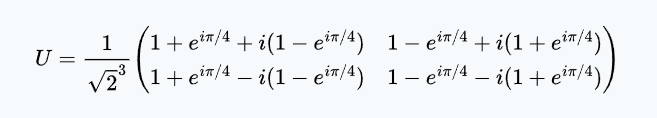

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def unitary_with_h_and_t():

    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)

    return qml.state()


Pauli-Z, Z-Rotation, S and T gates:

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)
    # APPLY PAULI Z
    qml.PauliZ(wires=0)
    # RETURN THE STATE
    return qml.state()



print(apply_z_to_plus())
#=============================
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    # IMPLEMENT THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3, wires=0)
    qml.adjoint(qml.S)(wires=0)

    # RETURN THE STATE

    return qml.state()


Plotting RX and RY:

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta, wires=0)

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

plot = plotter(angles, output_states)

#================

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)


    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta, wires=0)
    
    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plot = plotter(angles, output_states)


State preparation with gates or Mottonen:

In [ ]:
#Gates

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    theta = 2 * np.arccos(np.sqrt(3) / 2)
    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RY(theta, wires=0)
    qml.RZ(-np.pi / 2, wires=0)
    return qml.state()

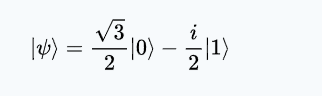

In [ ]:
#Mottonen State Preparation
v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)
# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE

@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(state, wires=0)
    return qml.state()


# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy="device")(v))


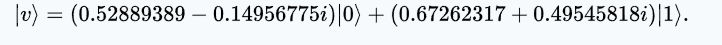

Measuring a superposition:

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gates
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY HADAMARD AND MEASURE
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))


Measurement in the Y-basis

In [ ]:
# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    state = np.array([1/2, 1j*np.sqrt(3)/2])
    qml.MottonenStatePreparation(state_vector= state, wires=0)
    


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def measure_in_y_basis():

    # PREPARE THE STATE
    prepare_psi()

    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    qml.adjoint(qml.S)(wires=0)
    qml.adjoint(qml.Hadamard)(wires=0)

    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES

    return qml.probs(wires=0) 


print(measure_in_y_basis())


Sampling and processing quantum measurement outcomes:

In [ ]:
dev = qml.device("default.qubit", wires=1, shots=100000)


@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE
    return qml.sample(qml.PauliY(wires=0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (np.array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = np.mean(samples)

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE

    return estimated_expval


samples = circuit()
print(compute_expval_from_samples(samples))


In [ ]:
#Variance of sample measurements

def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device("default.qubit", wires=1, shots=n_shots)

    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS
    results = np.array([circuit() for _ in range(n_trials)])

    return np.var(results)


def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    estimated_variance = 1/ n_shots

    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER

    return estimated_variance


# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
plot = plotter(shot_vals, results_experiment, results_scaling)


CNOT Operations with Bell State:

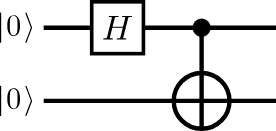

In [ ]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def apply_h_cnot():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"


In [ ]:
Controlled Rotations:

In [ ]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        np.array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    qml.Hadamard(wires=0)
    qml.CRX(theta, wires=[0,1])
    qml.CRY(phi, wires=[1,2])
    qml.CRZ(omega, wires=[2,0])

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES

    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))


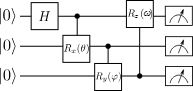

CZ with built-in function and with other gates:

In [ ]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(device=dev)
def true_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    # IMPLEMENT THE REGULAR CZ GATE HERE

    qml.CZ(wires=[0, 1])

    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    # IMPLEMENT CZ USING ONLY H AND CNOT
    qml.Hadamard(wires=1)  # Target
    qml.CNOT(wires=[0, 1])  
    qml.Hadamard(wires=1) 
    return qml.state()


print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")


SWAP Gate with built-in function and with CNOT gates:

In [ ]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    # IMPLEMENT THE REGULAR SWAP GATE HERE
    qml.SWAP(wires=[0, 1])

    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 0])
    qml.CNOT(wires=[0, 1])
    
    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")


Four qubit MCX:

In [ ]:
dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def four_qubit_mcx():
    ##################
    # Apply Hadamard gates to the control qubits
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)

    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X
    qml.MultiControlledX(control_wires=[0, 1, 2], wires=3, control_values="001")
    return qml.state()


print(four_qubit_mcx())


Four bell states implemented:

In [ ]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def prepare_psi_plus():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

@qml.qnode(dev)
def prepare_psi_minus():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliZ(wires=1)  
    return qml.state()

@qml.qnode(dev)
def prepare_phi_plus():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliX(wires=1)
    return qml.state()

@qml.qnode(dev)
def prepare_phi_minus():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliZ(wires=1)  
    qml.PauliX(wires=1)  
    return qml.state()

psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
print(f"|ψ_+> = {psi_plus}")
print(f"|ψ_-> = {psi_minus}")
print(f"|ϕ_+> = {phi_plus}")
print(f"|ϕ_-> = {phi_minus}")


Task 2: Variational classifier
======================
Here, we are implementing variatonal quantum classifiers using PennyLane: we train quantum circuits from labelled data for classification of new data samples. The two examples used are inspired by
two of the first papers that proposed variational circuits as supervised
machine learning models: [Farhi and Neven
(2018)](https://arxiv.org/abs/1802.06002) as well as [Schuld et al.
(2018)](https://arxiv.org/abs/1804.00633).


More precisely, the first example shows that a variational circuit can
be optimized to emulate the parity function

$$\begin{aligned}
f: x \in \{0,1\}^{\otimes n} \rightarrow y =
\begin{cases} 1 \text{  if uneven number of 1's in } x \\ 0
\text{ else}. \end{cases}
\end{aligned}$$

It demonstrates how to encode binary inputs into the initial state of
the variational circuit, which is simply a computational basis state
(*basis encoding*). In other words, we encode classical binary data into a quantum state. For example, 
the binary string x=0101 would be encoded into the quantum state ∣0101⟩.

The second example shows how to encode real vectors as amplitude vectors
into quantum states (*amplitude encoding*) and how to train a
variational circuit to recognize the first two classes of flowers in the
Iris dataset. Again, amplitude encoding is the process of encoding real-valued vectors into quantum states by mapping the real values to the amplitudes of the computational basis states of the quantum state, ensuring that the state is normalized.

## 1. Fitting the parity function


Imports
-------

We start by importing PennyLane, the PennyLane-provided version of
NumPy, and an optimizer.


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

## Quantum and classical nodes

We then create a quantum device that will run our circuits.


In [ ]:
dev = qml.device("default.qubit")

Inspired by neuron layers from classical machine learning, variational classifiers consist of "layers" or "blocks": repeats of elementary circuit architecture that combine to form the full variational circuit.

Our circuit layer will use four qubits, or wires, and consists of an
arbitrary rotation on every qubit, as well as a ring of CNOTs that
entangles each qubit with its neighbour. Again, borrowing from machine
learning, we call the parameters of the layer `weights`. These adjustable parameters determine the circuit performance. Our goal here is to find the optimal parameters to minimize the cost function for classification.


In [ ]:
def layer(layer_weights):
    for wire in range(4):
        qml.Rot(*layer_weights[wire], wires=wire)

    for wires in ([0, 1], [1, 2], [2, 3], [3, 0]):
        qml.CNOT(wires)

To make sure that the measured outputs are controlled by the inputs, we need a method to encode data inputs $x$. The process in this first example is quite simple: we have bitstrings as inputs, encoded into the state of the qubits.
The quantum state $\psi$ after state preparation is a computational basis
state that has 1s where $x$ has 1s, for example

$$x = 0101 \rightarrow |\psi \rangle = |0101 \rangle .$$

The `~pennylane.BasisState`{.interpreted-text role="class"} function
provided by PennyLane is made to do just this. It expects `x` to be a
list of zeros and ones, i.e. `[0,1,0,1]`.
We can imagine this process as building our "brick".

In [ ]:
def state_preparation(x):
    qml.BasisState(x, wires=[0, 1, 2, 3])

Now we are ready to define our variational circuit and its building blocks as this state preparation routine, followed by repetitions of this layer structure. In other words, we utilize the function above for creating blocks, in the function below for layering blocks:

In [ ]:
@qml.qnode(dev)
def circuit(weights, x):
    state_preparation(x)

    for layer_weights in weights:
        layer(layer_weights)
    #print("Circuit")
   

    return qml.expval(qml.PauliZ(0))

We are almost ready to define our complete variational classifier function. However, we have to consider bias here just as we do for classical machine learning for better fitting. If we want to add a "classical" bias parameter, the variational quantum
classifier also needs some post-processing. We define the full model as
a sum of the output of the quantum circuit, plus the trainable bias.


In [ ]:
def variational_classifier(weights, bias, x):
    print("VE",circuit(weights, x))
    return circuit(weights, x) + bias

 ##Cost
 
In supervised learning, the cost function that is used to evaluate model performance is generally the sum of a loss function and a regularizer. For simplicity, we restrict ourselves to the standard square
loss (mean squared error) that measures the distance between target labels and model
predictions, reducing large deviations in predictions.


In [ ]:
def square_loss(labels, predictions):
    # We use a call to qml.math.stack to allow subtracting the arrays directly
    return np.mean((labels - qml.math.stack(predictions)) ** 2)

To monitor how many inputs the current classifier predicted correctly,
we also define the accuracy, or the proportion of predictions that agree
with a set of target labels.


In [ ]:
def accuracy(labels, predictions):
    acc = sum(abs(l - p) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc

Now we move on to defining our cost function. For learning tasks, the cost depends on the data - here the features and
labels considered in the iteration of the optimization routine in order to minimize this function.


In [ ]:
def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

## Optimization

Let's now load and preprocess some data.

> **_NOTE:_** The parity dataset's
[train](https://raw.githubusercontent.com/XanaduAI/qml/master/_static/demonstration_assets/variational_classifier/data/parity_train.txt)
and
[test](https://raw.githubusercontent.com/XanaduAI/qml/master/_static/demonstration_assets/variational_classifier/data/parity_test.txt)
sets can be downloaded and should be placed in the subfolder `variational_classifier/data`.


In [ ]:
data = np.loadtxt("/kaggle/input/d/nazcet/parity/parity_train.txt", dtype=int)
X = np.array(data[:, :-1])
Y = np.array(data[:, -1])
Y = Y * 2 - 1  # shift label from {0, 1} to {-1, 1}

for x,y in zip(X, Y):
    print(f"x = {x}, y = {y}")

We initialize the variables randomly (but fix a seed for
reproducibility). Remember that one of the variables is used as a bias,
while the rest is fed into the gates of the variational circuit.


In [ ]:
np.random.seed(0)
num_qubits = 4
num_layers = 2
weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

print("Weights:", weights_init)
print("Bias: ", bias_init)

Next we create an optimizer instance and choose a batch size...


In [ ]:
opt = NesterovMomentumOptimizer(0.5)
batch_size = 5

...and run the optimizer to train our model. We track the accuracy - the
share of correctly classified data samples. For this we compute the
outputs of the variational classifier and turn them into predictions in
$\{-1,1\}$ by taking the sign of the output.


In [ ]:
weights = weights_init
bias = bias_init
for it in range(100):

    # Update the weights by one optimizer step, using only a limited batch of data
    batch_index = np.random.randint(0, len(X), (batch_size,))
    X_batch = X[batch_index]
    Y_batch = Y[batch_index]
    weights, bias = opt.step(cost, weights, bias, X=X_batch, Y=Y_batch)

    # Compute accuracy
    predictions = [np.sign(variational_classifier(weights, bias, x)) for x in X]

    current_cost = cost(weights, bias, X, Y)
    acc = accuracy(Y, predictions)

    print(f"Iter: {it+1:4d} | Cost: {current_cost:0.7f} | Accuracy: {acc:0.7f}")

As we can see, the variational classifier learned to classify all bit
strings from the training set correctly.

But unlike optimization, in machine learning the goal is to generalize
from limited data to *unseen* examples. Even if the variational quantum
circuit was perfectly optimized with respect to the cost, it might not
generalize, a phenomenon known as *overfitting*. The art of (quantum)
machine learning is to create models and learning procedures that tend
to find \"good\" minima, or those that lead to models which generalize
well.

With this in mind, let\'s look at a test set of examples we have not
used during training:


In [ ]:
data = np.loadtxt("/kaggle/input/d/nazcet/parity/parity_test.txt", dtype=int)
X_test = np.array(data[:, :-1])
Y_test = np.array(data[:, -1])
Y_test = Y_test * 2 - 1  # shift label from {0, 1} to {-1, 1}
    
predictions_test = [np.sign(variational_classifier(weights, bias, x)) for x in X_test]

for x,y,p in zip(X_test, Y_test, predictions_test):
    print(f"x = {x}, y = {y}, pred={p}")
    
acc_test = accuracy(Y_test, predictions_test)
print("Accuracy on unseen data:", acc_test)

The quantum circuit has also learnt to predict all unseen examples
perfectly well! This is actually remarkable, since the encoding strategy
creates quantum states from the data that have zero overlap \-- and
hence the states created from the test set have no overlap with the
states created from the training set. There are many functional
relations the variational circuit could learn from this kind of
representation, but the classifier chooses to label bit strings
according to our ground truth, the parity function.

Let\'s look at the second example, in which we use another encoding
strategy.

## 2. Iris classification

We now move on to classifying data points from the Iris dataset, which
are no longer simple bitstrings but represented as real-valued vectors.
The vectors are 2-dimensional, but we will add some \"latent
dimensions\" and therefore encode inputs into 2 qubits.

Quantum and classical nodes
---------------------------

State preparation is not as simple as when we represent a bitstring with
a basis state. Every input x has to be translated into a set of angles
which can get fed into a small routine for state preparation. To
simplify things a bit, we will work with data from the positive
subspace, so that we can ignore signs (which would require another
cascade of rotations around the Z-axis).

The circuit is coded according to the scheme in [Möttönen, et al.
(2004)](https://arxiv.org/abs/quant-ph/0407010), or---as presented for
positive vectors only---in [Schuld and Petruccione
(2018)](https://link.springer.com/book/10.1007/978-3-319-96424-9). We
also decomposed controlled Y-axis rotations into more basic gates,
following [Nielsen and Chuang
(2010)](http://www.michaelnielsen.org/qcqi/).


In [ ]:
def get_angles(x):
    beta0 = 2 * np.arcsin(np.sqrt(x[1] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1e-12))
    beta1 = 2 * np.arcsin(np.sqrt(x[3] ** 2) / np.sqrt(x[2] ** 2 + x[3] ** 2 + 1e-12))
    beta2 = 2 * np.arcsin(np.linalg.norm(x[2:]) / np.linalg.norm(x))

    return np.array([beta2, -beta1 / 2, beta1 / 2, -beta0 / 2, beta0 / 2])


def state_preparation(a):
    qml.RY(a[0], wires=0)

    qml.CNOT(wires=[0, 1])
    qml.RY(a[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[2], wires=1)

    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[3], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[4], wires=1)
    qml.PauliX(wires=0)

Let's test if this routine actually works.


In [ ]:
x = np.array([0.53896774, 0.79503606, 0.27826503, 0.0], requires_grad=False)
ang = get_angles(x)


@qml.qnode(dev)
def test(angles):
    state_preparation(angles)

    return qml.state()


state = test(ang)

print("x               : ", np.round(x, 6))
print("angles          : ", np.round(ang, 6))
print("amplitude vector: ", np.round(np.real(state), 6))

The method computed the correct angles to prepare the desired state!

> **_NOTE:_** 
> The `default.qubit` simulator provides a shortcut to
> `state_preparation` with the command `qml.StatePrep(x, wires=[0, 1])`.
> On state simulators, this just replaces the quantum state with our
> (normalized) input. On hardware, the operation implements more
> sophisticated versions of the routine used above.


Since we are working with only 2 qubits now, we need to update the
`layer` function. In addition, we redefine the `cost` function to pass
the full batch of data to the state preparation of the circuit
simultaneously, a technique similar to NumPy broadcasting.


In [ ]:
def layer(layer_weights):
    for wire in range(2):
        qml.Rot(*layer_weights[wire], wires=wire)
    qml.CNOT(wires=[0, 1])


def cost(weights, bias, X, Y):
    # Transpose the batch of input data in order to make the indexing
    # in state_preparation work
    predictions = variational_classifier(weights, bias, X.T)
    return square_loss(Y, predictions)

 ## Data

We load the Iris data set. There is a bit of preprocessing to do in
order to encode the inputs into the amplitudes of a quantum state. We
will augment the data points by two so-called \"latent dimensions\",
making the size of the padded data point match the size of the state
vector in the quantum device. We then need to normalize the data points,
and finally, we translate the inputs x to rotation angles using the
`get_angles` function we defined above.

Data preprocessing should always be done with the problem in mind; for
example, if we do not add any latent dimensions, normalization erases
any information on the length of the vectors and classes separated by
this feature will not be distinguishable.

> **_NOTE:_** 
The Iris dataset can be downloaded
`<a href="https://raw.githubusercontent.com/XanaduAI/qml/master/_static/demonstration_assets/variational_classifier/data/iris_classes1and2_scaled.txt"
download=parity.txt target="_blank">here</a>`{.interpreted-text
role="html"} and should be placed in the subfolder
`variational_classifer/data`.


In [ ]:
data = np.loadtxt("/kaggle/input/iris-vqc/iris_classes1and2_scaled.txt")
X = data[:, 0:2]
print(f"First X sample (original)  : {X[0]}")

# pad the vectors to size 2^2=4 with constant values
padding = np.ones((len(X), 2)) * 0.1
X_pad = np.c_[X, padding]
print(f"First X sample (padded)    : {X_pad[0]}")

# normalize each input
normalization = np.sqrt(np.sum(X_pad**2, -1))
X_norm = (X_pad.T / normalization).T
print(f"First X sample (normalized): {X_norm[0]}")

# the angles for state preparation are the features
features = np.array([get_angles(x) for x in X_norm], requires_grad=False)
print(f"First features sample      : {features[0]}")

Y = data[:, -1]

These angles are our new features, which is why we have renamed X to
"features" above. Let's plot the stages of preprocessing and play around
with the dimensions (dim1, dim2). Some of them still separate the
classes well, while others are less informative.


In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:, 0][Y == 1], X[:, 1][Y == 1], c="b", marker="o", ec="k")
plt.scatter(X[:, 0][Y == -1], X[:, 1][Y == -1], c="r", marker="o", ec="k")
plt.title("Original data")
plt.show()

plt.figure()
dim1 = 0
dim2 = 1
plt.scatter(X_norm[:, dim1][Y == 1], X_norm[:, dim2][Y == 1], c="b", marker="o", ec="k")
plt.scatter(X_norm[:, dim1][Y == -1], X_norm[:, dim2][Y == -1], c="r", marker="o", ec="k")
plt.title(f"Padded and normalised data (dims {dim1} and {dim2})")
plt.show()

plt.figure()
dim1 = 0
dim2 = 3
plt.scatter(features[:, dim1][Y == 1], features[:, dim2][Y == 1], c="b", marker="o", ec="k")
plt.scatter(features[:, dim1][Y == -1], features[:, dim2][Y == -1], c="r", marker="o", ec="k")
plt.title(f"Feature vectors (dims {dim1} and {dim2})")
plt.show()

This time we want to generalize from the data samples. This means that
we want to train our model on one set of data and test its performance
on a second set of data that has not been used in training. To monitor
the generalization performance, the data is split into training and
validation set.


In [ ]:
np.random.seed(0)
num_data = len(Y)
num_train = int(0.75 * num_data)
index = np.random.permutation(range(num_data))
feats_train = features[index[:num_train]]
Y_train = Y[index[:num_train]]
feats_val = features[index[num_train:]]
Y_val = Y[index[num_train:]]

# We need these later for plotting
X_train = X[index[:num_train]]
X_val = X[index[num_train:]]

Optimization
============

First we initialize the variables.


In [ ]:
num_qubits = 2
num_layers = 6

weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

Again we minimize the cost, using the imported optimizer.


In [ ]:
opt = NesterovMomentumOptimizer(0.01)
batch_size = 5

# train the variational classifier
weights = weights_init
bias = bias_init
for it in range(60):
    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, num_train, (batch_size,))
    feats_train_batch = feats_train[batch_index]
    Y_train_batch = Y_train[batch_index]
    weights, bias, _, _ = opt.step(cost, weights, bias, feats_train_batch, Y_train_batch)

    # Compute predictions on train and validation set
    predictions_train = np.sign(variational_classifier(weights, bias, feats_train.T))
    predictions_val = np.sign(variational_classifier(weights, bias, feats_val.T))

    # Compute accuracy on train and validation set
    acc_train = accuracy(Y_train, predictions_train)
    acc_val = accuracy(Y_val, predictions_val)

    if (it + 1) % 2 == 0:
        _cost = cost(weights, bias, features, Y)
        print(
            f"Iter: {it + 1:5d} | Cost: {_cost:0.7f} | "
            f"Acc train: {acc_train:0.7f} | Acc validation: {acc_val:0.7f}"
        )

We can plot the continuous output of the variational classifier for the
first two dimensions of the Iris data set.


In [ ]:
plt.figure()
cm = plt.cm.RdBu

# make data for decision regions
xx, yy = np.meshgrid(np.linspace(0.0, 1.5, 30), np.linspace(0.0, 1.5, 30))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]

# preprocess grid points like data inputs above
padding = 0.1 * np.ones((len(X_grid), 2))
X_grid = np.c_[X_grid, padding]  # pad each input
normalization = np.sqrt(np.sum(X_grid**2, -1))
X_grid = (X_grid.T / normalization).T  # normalize each input
features_grid = np.array([get_angles(x) for x in X_grid])  # angles are new features
predictions_grid = variational_classifier(weights, bias, features_grid.T)
Z = np.reshape(predictions_grid, xx.shape)

# plot decision regions
levels = np.arange(-1, 1.1, 0.1)
cnt = plt.contourf(xx, yy, Z, levels=levels, cmap=cm, alpha=0.8, extend="both")
plt.contour(xx, yy, Z, levels=[0.0], colors=("black",), linestyles=("--",), linewidths=(0.8,))
plt.colorbar(cnt, ticks=[-1, 0, 1])

# plot data
for color, label in zip(["b", "r"], [1, -1]):
    plot_x = X_train[:, 0][Y_train == label]
    plot_y = X_train[:, 1][Y_train == label]
    plt.scatter(plot_x, plot_y, c=color, marker="o", ec="k", label=f"class {label} train")
    plot_x = (X_val[:, 0][Y_val == label],)
    plot_y = (X_val[:, 1][Y_val == label],)
    plt.scatter(plot_x, plot_y, c=color, marker="^", ec="k", label=f"class {label} validation")

plt.legend()
plt.show()

We find that the variational classifier learnt a separating line between
the datapoints of the two different classes, which allows it to classify
even the unseen validation data with perfect accuracy.


# Task 3: Quanvolutional Neural Networks (QNNs)

## Classical convolution
The convolutional neural network (CNN) is a standard model in classical machine learning which is particularly suitable for processing images. The model is based on the idea of a convolution layer where, instead of processing the full input data with a global function, a local convolution is applied.

If the input is an image, small local regions are sequentially processed with the same kernel. The results obtained for each region are usually associated to different channels of a single output pixel. The union of all the output pixels produces a new image-like object, which can be further processed by additional layers.

## Quantum convolution
One can extend the same idea also to the context of quantum variational circuits. A possible approach is given by the following procedure which is very similar to the one used in Ref. [1]. The scheme is also represented in the figure at the top of this tutorial.

A small region of the input image, in our example a  
2
×
2
  square, is embedded into a quantum circuit. In this demo, this is achieved with parametrized rotations applied to the qubits initialized in the ground state.

A quantum computation, associated to a unitary  
U
 , is performed on the system. The unitary could be generated by a variational quantum circuit or, more simply, by a random circuit as proposed in Ref. [1].

The quantum system is finally measured, obtaining a list of classical expectation values. The measurement results could also be classically post-processed as proposed in Ref. [1] but, for simplicity, in this demo we directly use the raw expectation values.

Analogously to a classical convolution layer, each expectation value is mapped to a different channel of a single output pixel.

Iterating the same procedure over different regions, one can scan the full input image, producing an output object which will be structured as a multi-channel image.

The quantum convolution can be followed by further quantum layers or by classical layers.

The main difference with respect to a classical convolution is that a quantum circuit can generate highly complex kernels whose computation could be, at least in principle, classically intractable.

> **_NOTE:_** In this tutorial we follow the approach of Ref. [1] in which a fixed non-trainable quantum circuit is used as a “quanvolution” kernel, while the subsequent classical layers are trained for the classification problem of interest. However, by leveraging the ability of PennyLane to evaluate gradients of quantum circuits, the quantum kernel could also be trained.

This Python code requires PennyLane with the TensorFlow interface and the plotting library matplotlib.



In [ ]:
!pip install pennylane

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Setting of the main hyper-parameters of the model


In [ ]:
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 50    # Size of the train dataset
n_test = 30     # Size of the test dataset

SAVE_PATH = "/kaggle/working/"  # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

## Loading of the MNIST dataset
We import the MNIST dataset from Keras. To speedup the evaluation of this demo we use only a small number of training and test images. Obviously, better results are achievable when using the full dataset.



In [ ]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)

## Quantum circuit as a convolution kernel

We follow the scheme described in the introduction and represented in the figure at the top of this demo.

We initialize a PennyLane default.qubit device, simulating a system of  
4
  qubits. The associated qnode represents the quantum circuit consisting of:

an embedding layer of local  
R
y
  rotations (with angles scaled by a factor of  
π
 );

a random circuit of n_layers;

a final measurement in the computational basis, estimating  
4
  expectation values.

In [ ]:
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

The next function defines the convolution scheme:

the image is divided into squares of  
2
×
2
  pixels;

each square is processed by the quantum circuit;

the  
4
  expectation values are mapped into  
4
  different channels of a single output pixel.
  

> **_NOTE:_**  This process halves the resolution of the input image. In the standard language of CNN, this would correspond to a convolution with a  
2
×
2
  kernel and a stride equal to  
2
 .



In [ ]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

## Quantum pre-processing of the dataset

Since we are not going to train the quantum convolution layer, it is more efficient to apply it as a “pre-processing” layer to all the images of our dataset. Later an entirely classical model will be directly trained and tested on the pre-processed dataset, avoiding unnecessary repetitions of quantum computations.

The pre-processed images will be saved in the folder SAVE_PATH. Once saved, they can be directly loaded by setting PREPROCESS = False, otherwise the quantum convolution is evaluated at each run of the code.

In [ ]:
if PREPROCESS == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(train_images):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(test_images):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
    np.save(SAVE_PATH + "q_test_images.npy", q_test_images)


# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

Let us visualize the effect of the quantum convolution layer on a batch of samples:



In [ ]:
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

Below each input image, the  
4
  output channels generated by the quantum convolution are visualized in gray scale.

One can clearly notice the downsampling of the resolution and some local distortion introduced by the quantum kernel. On the other hand the global shape of the image is preserved, as expected for a convolution layer.

## Hybrid quantum-classical model
After the application of the quantum convolution layer we feed the resulting features into a classical neural network that will be trained to classify the  
10
  different digits of the MNIST dataset.

We use a very simple model: just a fully connected layer with 10 output nodes with a final softmax activation function.

The model is compiled with a stochastic-gradient-descent optimizer, and a cross-entropy loss function.



In [ ]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

### Training
We first initialize an instance of the model, then we train and validate it with the dataset that has been already pre-processed by a quantum convolution.

In [ ]:
q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

In order to compare the results achievable with and without the quantum convolution layer, we initialize also a “classical” instance of the model that will be directly trained and validated with the raw MNIST images (i.e., without quantum pre-processing).



In [ ]:
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

### Results

We can finally plot the test accuracy and the test loss with respect to the number of training epochs.



In [ ]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

# Task 4: Code for Sine Function

In [ ]:
!pip install pennylane --upgrade

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

In [ ]:
dev = qml.device("default.qubit", wires=1)

In [ ]:
qml.qnode(dev)

In [ ]:
def layer(layer_weights):
    qml.Rot(*layer_weights[0], wires=0)

In [183]:
def state_preparation(x):
    #qml.BasisState(x, wires=[0, 1])
    #print(x)
    qml.templates.AngleEmbedding(features=x, wires=range(2),rotation='Y')

In [ ]:

def circuit(weights, x):
    #print("inside circuit")
    state_preparation(x)
    #print(x)
    print(weights)

    for layer_weights in weights:
        #print(layer_weights)
        layer(layer_weights)
    #print("Circuit")
    #print(qml.expval(qml.PauliZ(0)))

    return qml.expval(qml.PauliZ(0))

In [ ]:
def variational_classifier(weights, bias, x):
    #print("inside variational_classifier")
    print("VE",circuit(weights, x))
    return circuit(weights, x) + bias

In [ ]:
def square_loss(labels, predictions):
    #print("inside square_loss")
    # We use a call to qml.math.stack to allow subtracting the arrays directly
    return np.mean((labels - qml.math.stack(predictions)) ** 2)

In [ ]:
def accuracy(labels, predictions):
   # print("inside accuracy")
    acc = sum(abs(l - p) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc

In [ ]:
def cost(weights, bias, X, Y):
    #print("inside cost")
    predictions = [variational_classifier(weights, bias, x) for x in X]
    #print(square_loss(Y, predictions))
    return square_loss(Y, predictions)

In [ ]:
num_of_data = 64
theta =  np.random.randint(10, size=(num_of_data,1))
sin_theta = np.sin(theta[:,0]) # Learn sin (x)
for x,y in zip(theta, sin_theta):
    print(f"x = {x}, y = {y}")

In [ ]:
theta

In [ ]:
sin_theta

In [ ]:
# data = np.loadtxt("/kaggle/input/parity/parity_train.txt", dtype=int)
data = np.loadtxt("/kaggle/input/d/nazcet/parity/parity_train.txt", dtype=int)
X = np.array(data[:, :-1])
Y = np.array(data[:, -1])
Y = Y * 2 - 1  # shift label from {0, 1} to {-1, 1}

for x,y in zip(X, Y):
    print(f"x = {x}, y = {y}")

In [ ]:
X

In [ ]:
Y

In [ ]:
# np.random.seed(0)
# num_qubits = 1
# num_layers = 0
# weights_init = 0.01 * np.random.randn( 1,num_qubits, 3, requires_grad=True)
# bias_init = np.array(0.0, requires_grad=True)

np.random.seed(0)
num_qubits = 4
num_layers = 1
weights_init = 0.01 * np.random.randn(num_layers,num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

In [ ]:
print("Weights:", weights_init)
print("Bias: ", bias_init)

In [ ]:
opt = NesterovMomentumOptimizer(0.5)
batch_size = 5

## debug

In [184]:
weights = weights_init
bias = bias_init
for it in range(100):
    #print("weights")
    #print(weights)

    #Update the weights by one optimizer step, using only a limited batch of data
#     batch_index = np.random.randint(0, len(theta), (batch_size,))
#     X_batch = theta[batch_index]
#     Y_batch = sin_theta[batch_index]
    weights, bias = opt.step(cost, weights, bias, X=theta, Y=sin_theta)
    #weights, bias = opt.step(cost, weights, bias, X=None, Y=None)
    

    # Compute accuracy
    predictions = [np.sign(variational_classifier(weights, bias, x)) for x in X]

    current_cost = cost(weights, bias, X, Y)
    acc = accuracy(Y, predictions)

    print(f"Iter: {it+1:4d} | Cost: {current_cost:0.7f} | Accuracy: {acc:0.7f}")

Autograd ArrayBox with value [[[ 0.01764052  0.00400157  0.00978738]
  [ 0.02240893  0.01867558 -0.00977278]
  [ 0.00950088 -0.00151357 -0.00103219]
  [ 0.00410599  0.00144044  0.01454274]]]
VE expval(Z(0))
Autograd ArrayBox with value [[[ 0.01764052  0.00400157  0.00978738]
  [ 0.02240893  0.01867558 -0.00977278]
  [ 0.00950088 -0.00151357 -0.00103219]
  [ 0.00410599  0.00144044  0.01454274]]]


TypeError: unsupported operand type(s) for +: 'ExpectationMP' and 'float'

In [ ]:
# Define the variational form V and observable M and combine them into a QNode.
qml.qnode(dev, diff_method="parameter-shift", max_diff=2)

In [ ]:
num_of_data = 64
X =  np.random.uniform(high=2 * np.pi, size=(num_of_data,1))
Y = np.sin(X[:,0]) # Learn sin (x)

In [ ]:

np.random.seed(0)
n_qubits = 2
num_layers = 2
weights_init = 0.01 * np.random.randn(num_layers, n_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

In [ ]:
weights_init

In [ ]:
var_init

In [ ]:
# Data encoding and variational ansatz
def quantum_neural_net(features, para):
    print('features')
    print(features)
    print('para')
    print(para)
    qml.templates.AngleEmbedding(features=features, wires=range(n_qubits),rotation='Y')
    qml.templates.StronglyEntanglingLayers(weights=para, wires=range(n_qubits))
    print(qml)
    x=qml.expval(qml.PauliZ(0))
    print('Value')
    print(x)
    return qml.expval(qml.PauliZ(0))

In [ ]:
def variational_classifier(para, bias, features):
    print("xyz134")
    x=quantum_neural_net(features, para)
    print("xyz134")
    print(x)
    return x+bias

In [ ]:
def mse(observed,predictions):
    loss = 0.0
    for l, p in zip(observed, predictions):
        print("xyz1")
        loss +=(l - p) ** 2
        print("xyz2")
        
    loss = loss / len(observed)
    return np.mean(np.array(loss))

In [ ]:
def cost(para, bias, features, labels):
    predictions = [variational_classifier(para, bias, f) for f in features]
    return mse(labels, predictions)

In [ ]:
opt = qml.GradientDescentOptimizer(stepsize=0.01)

In [ ]:
batch_size = 5

# train the variational classifier
weights = weights_init
bias = bias_init

In [ ]:
X =  np.random.uniform(high=2 * np.pi, size=(num_of_data,1))
Y = np.sin(X[:,0]) # Learn sin (x)

In [ ]:
X

In [ ]:
Y

In [ ]:
X_train = X[0:50]
Y_train =Y[0:50]


In [ ]:
Y_train

In [ ]:
batch_size = 5

# train the variational classifier
weights = weights_init
bias = bias_init

num_train=50

In [ ]:
for it in range(100):

    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, num_train, (batch_size,))
    x_train_batch = X_train[batch_index]
    y_train_batch = Y_train[batch_index]
    (weights,bias,_,_), _cost = opt.step_and_cost(cost, weights,bias,x_train_batch,y_train_batch)
    #print(weights)

    # Compute predictions on train and validation set
    predictions_train = [np.sign(variational_classifier(weights, bias, f)) for f in x_train]

In [ ]:
hist_cost = []
var = var_init
for it in range(50):
    t1 = time.time() 
    var, _cost = opt.step_and_cost(lambda v: cost(v, X, Y), var)
    t2 = time.time() 
    elapsed_time = t2-t1
    print("Iter:"+str(it)+", cost="+str(_cost.numpy()))
    print(f"Time：{elapsed_time}")
    hist_cost.append(_cost)